In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from google.colab import output
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# 데이터 불러오기

In [3]:
film = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/드라마랜드 크롤링 - 시트1.csv')
stay = pd.read_csv ('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/부산광역시 우수숙박업소현황(202106) - 부산광역시 우수숙박업소현황(202106).csv')
shop = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/부산쇼핑정보 - 부산쇼핑정보.csv')
park = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/공원.csv')
tour = pd.read_csv ('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/촬영지와관광명소.csv')
info = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/촬영지와안내소.csv')

In [4]:
nation = pd.read_csv ('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/본론/부산관광지별국적별카드매출현황(202112).csv')
food = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/부산관광공사_음식테마거리 음식점 기본정보_20220101.csv')

# 데이터 확인 및 정리

## 크롤링 데이터

In [5]:
film.head()

,Unnamed: 0,Title,Drama,Movie,Mv,Variety,위도,경도,주소,오는길,동
0,1,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동
1,2,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍
2,3,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동
3,4,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동
4,5,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동


In [6]:
film.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [7]:
film.rename(columns={'Title':'촬영지명'},inplace=True)

In [8]:
film.rename(columns={'Drama':'드라마'},inplace=True)

In [9]:
film.rename(columns={'Movie':'영화'},inplace=True)

In [10]:
film.rename(columns={'Mv':'뮤직비디오'},inplace=True)

In [11]:
film.rename(columns={'Variety':'예능'},inplace=True)

In [12]:
film.rename(columns={'오는길':'도보시간'},inplace=True)

In [13]:
film.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동


## 숙박업소

In [14]:
stay.head()

,Unnamed: 0,SKEY,STAYNG_BSSH_SE,GUGUN_NM,ADRES,BSSH_NM,CTTPC,동
0,0,1,청정숙박,수영구,수영구 광안해변로 155 (광안동),브릿지모텔,755-0573,광안동
1,1,2,청정숙박,금정구,금정구 청룡예전로 5 (청룡동),범어장,508-5804,청룡동
2,2,3,청정숙박,연제구,연제구 중앙대로 1122 (연산동),센트럴호텔,866-6225,연산동
3,3,7,청정숙박,해운대구,해운대구 해운대해변로 271 (중동),MS호텔,741-3838,중동
4,4,8,청정숙박,해운대구,해운대구 중동1로 41(중동),게스트하우스 포비,746-7990,중동


In [15]:
# 각 동의 숙박업소 개수 
stay1 = stay.groupby(['동']).agg({'STAYNG_BSSH_SE':'count'}).reset_index()

In [16]:
stay1

,동,STAYNG_BSSH_SE
0,감전동,7
1,개금동,2
2,광안동,14
3,괘법동,30
4,괴정동,1
...,...,...
65,층중동,2
66,토성동,4
67,하단동,12
68,학장동,4


In [17]:
stay1.rename(columns={'STAYNG_BSSH_SE':'동별 숙박업소 수'},inplace=True)

In [18]:
stay1.head()

,동,동별 숙박업소 수
0,감전동,7
1,개금동,2
2,광안동,14
3,괘법동,30
4,괴정동,1


## 쇼핑센터

In [19]:
shop.head()

,Unnamed: 0,콘텐츠ID,콘텐츠명,구군,위도,경도,장소,제목,부제목,주요장소,...,운영일,휴무일,운영 및 시간,이용요금,편의시설,이미지URL,썸네일이미지URL,상세내용,지번주소,동
0,0,292,기장시장,기장군,35.243847,129.21524,기장시장,좌판의 힘 기장시장,-,기장시장,...,-,연중무휴,매일 07:00~22:00,가게별 상이,-,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,알록달록 파라솔 사이로 정이 넘치는 기장 아지매들의 환한 미소가 빛난다. 바다에서 ...,부산광역시 기장군 기장읍 대라리 72-1 기장시장,기장읍
1,1,293,민락회타운,수영구,35.155643,129.12370,민락회타운,광안리 바다의 참맛 민락회타운,-,민락회타운,...,-,연중무휴,매일 09:00~02:00(가게별 상이),"1층 활어판매시장 횟감구입 별도 / 2~10층 횟집 상차림 1인 5,000원","장애인 화장실, 휠체어 접근 가능",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,광안리 바다와 광안대교를 바라보며 들어서 있는 민락회타운. 1층 활어판매시장에서 횟...,부산광역시 수영구 민락동 181-84 민락타운,민락동
2,2,294,해운대시장,해운대구,35.161650,129.16210,해운대시장,텔레비전에 나온 시장맛집 해운대시장,-,해운대시장,...,-,연중무휴,09:00 - 22:00,가게별 상이,휠체어 접근 가능,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,해운대 해수욕장과 5분 거리에 위치한 해운대시장은 다양한 먹거리와 볼거리로 항상 북...,부산광역시 해운대구 중동 1394-193,중동
3,3,300,남항시장 / 봉래시장,영도구,35.088760,129.04222,남항시장 / 봉래시장,영도 토박이 남항시장 & 봉래시장,-,남항시장 / 봉래시장,...,-,"1, 3주 일요일",매일(휴무일 제외) 09:00~21:00,점포별 상이,-,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,영도의 오랜 정취가 살아있는 남항시장과 봉래시장으로 가족나들이 어떠세요?남항시장피란...,부산광역시 영도구 영선동1가 99-5,영선동
4,4,327,부전시장,부산진구,35.162804,129.06134,부전마켓타운,기억의 장터 부전마켓타운,-,부전마켓타운,...,-,"첫째, 셋째 일요일",월~일 04:00~19:00,점포별 상이,"장애인 주차구역, 휠체어접근 가능",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"한국전쟁 이후 피난민들이 모여 일군 삶의 터전, 부전시장. 지금은 부전마켓타운이라는...",부산광역시 부산진구 부전동 573-3 부전시장,부전동


In [20]:
# 각 동의 쇼핑센터 개수 
shop1 = shop.groupby(['동']).agg({'콘텐츠명':'count'}).reset_index()

In [21]:
shop1

,동,콘텐츠명
0,광복동,2
1,구포동,1
2,기장읍,3
3,남포동,1
4,대저동,1
5,민락동,1
6,범일동,1
7,복천동,1
8,부전동,5
9,부평동,1


In [22]:
shop1.rename(columns={'콘텐츠명':'동별 쇼핑센터 수'},inplace=True)

In [23]:
shop1.head()

,동,동별 쇼핑센터 수
0,광복동,2
1,구포동,1
2,기장읍,3
3,남포동,1
4,대저동,1


## 공원

In [24]:
park.head()

,PLC_NM,TRRSRT_ROAD_NM_ADDR,TRNSPORT_INFO_CN,CRSLK_ADDR,CRSLK_ROAD_NM,CHILD_PRTC_ZONE_AT,CRSLK_LA,CRSLK_LO,동
0,중앙공원,"중앙공원 부산광역시 서구 망양로 193번길 187, 민주공원 부산광역시시 중구 민주...",도시철도 1호선 초량역 1번 출구 → 508 버스 환승 → 중앙공원?민주공원 하차 ...,부산 서구 동대신동2가 102-35,망양로,N,35.11318,129.02600,동대신동
1,유엔기념공원,유엔기념공원 부산광역시 남구 유엔평화로 93 유엔평화기념관 부산광역시 남구 홍곡로3...,"유엔기념공원, 도시철도 2호선 대연역 3번 출구 도보 18분, 버스 134, 68,...",부산 남구 대연동 737-9,유엔평화로,Y,35.12625,129.09576,대연동
2,APEC나루공원,부산광역시 해운대구 수영강변대로 93,"도시철도 2호선 센텀시티역 12번 출구 도보 10분, 버스 139 영화의전당 하차 ...",부산 해운대구 우동 1524,수영강변대로,N,35.17041,129.13424,우동
3,수영강시민공원,부산광역시 해운대구 반여동 1502-16,동해선 부산원동역 2번 출구 도보 15분,부산 해운대구 반여동 1199-15,수영강변대로,Y,35.20046,129.11678,반여동
4,용두산공원,부산광역시 중구 용두산길 37-55,"도시철도 1호선 중앙역 1번 출구 도보 6분, 1호선 남포역 7번 출구 도보 7분,...",부산 중구 대청동1가 36-5,대청로,Y,35.10291,129.03291,대청동


In [25]:
# 각 동의 공원 개수 
park1 = park.groupby(['동']).agg({'PLC_NM':'count'}).reset_index()

In [26]:
park1.rename(columns={'PLC_NM':'동별 공원 수'},inplace=True)

In [27]:
park1.head()

,동,동별 공원 수
0,감전동,1
1,광안동,1
2,괘법동,1
3,구포동,1
4,기장읍,3


## 관광명소

In [28]:
tour.head()

,Unnamed: 0,촬영지명,촬영지index,매칭된관광지명,매칭된관광지까지의거리,매칭된관광지index
0,0,Busan X The Sky [부산엑스더스카이],0,해운대,1756,72
1,1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,해동용궁사,0,6
2,2,Baetmeori Sikdang [뱃머리식당],2,깡깡이 예술마을,387,1
3,3,Hyein Shipbuilding [혜인선박],3,깡깡이 예술마을,97,1
4,4,Busan Bridge [부산대교],4,"40계단, 문화관",1316,63


In [29]:
tour1 = tour[['촬영지명','매칭된관광지명','매칭된관광지까지의거리']]

In [30]:
tour1.head()

,촬영지명,매칭된관광지명,매칭된관광지까지의거리
0,Busan X The Sky [부산엑스더스카이],해운대,1756
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],해동용궁사,0
2,Baetmeori Sikdang [뱃머리식당],깡깡이 예술마을,387
3,Hyein Shipbuilding [혜인선박],깡깡이 예술마을,97
4,Busan Bridge [부산대교],"40계단, 문화관",1316


## 안내소

In [31]:
info.head()

,Unnamed: 0,촬영지명,촬영지index,매칭된안내소명,매칭된안내소까지의거리,매칭된안내소index
0,0,Busan X The Sky [부산엑스더스카이],0,달맞이길 관광안내소,1638,10
1,1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,송정관광안내소,3547,9
2,2,Baetmeori Sikdang [뱃머리식당],2,영도관광안내센터,968,3
3,3,Hyein Shipbuilding [혜인선박],3,영도관광안내센터,1143,3
4,4,Busan Bridge [부산대교],4,영도관광안내센터,1067,3


In [32]:
info1 = info[['촬영지명','매칭된안내소명','매칭된안내소까지의거리']]

In [33]:
info1.head()

,촬영지명,매칭된안내소명,매칭된안내소까지의거리
0,Busan X The Sky [부산엑스더스카이],달맞이길 관광안내소,1638
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],송정관광안내소,3547
2,Baetmeori Sikdang [뱃머리식당],영도관광안내센터,968
3,Hyein Shipbuilding [혜인선박],영도관광안내센터,1143
4,Busan Bridge [부산대교],영도관광안내센터,1067


## 관광지별 국적별 매출현황

In [34]:
nation.head()

,PLC_NM,NTN_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
0,BIFF광장&용두산공원&보수동책방골목,일본,226489999.0,5228,2020년 1분기
1,BIFF광장&용두산공원&보수동책방골목,대만,159608606.0,2703,2020년 1분기
2,BIFF광장&용두산공원&보수동책방골목,중국,53957560.0,864,2020년 1분기
3,BIFF광장&용두산공원&보수동책방골목,미국,48896670.0,1477,2020년 1분기
4,BIFF광장&용두산공원&보수동책방골목,태국,16107500.0,335,2020년 1분기


In [35]:
nation['PLC_NM'].unique()

array(['BIFF광장&용두산공원&보수동책방골목', '감천문화마을', '광안리해수욕장', '동백섬&누리마루APEC하우스',
       '마린시티 카페거리', '부산 서면', '부산시민공원', '센텀시티(신세계센텀 등)', '송도해수욕장',
       '송정해수욕장', '오륙도&이기대 갈맷길', '을숙도', '일광해수욕장', '자갈치·국제시장·부평깡통야시장',
       '전포카페거리', '태종대', '해운대 해수욕장', '흰여울문화마을', '광안리 해수욕장', '국립해양박물관',
       '렛츠런파크', '부산서면', '송도 해수욕장', '송정 해수욕장', '일광 해수욕장',
       'BIFF광장·용두산공원·보수동책방골목', '"다대포 해수욕장(꿈의 낙조분수', '해운대해수욕장'],
      dtype=object)

In [36]:
tour['매칭된관광지명'].unique()

array(['해운대', '해동용궁사', '깡깡이 예술마을', '40계단, 문화관', '구 백제병원',
       '정승빈작가-아미동비석마을(한,영,중간,중번,일)', '조선통신사역사관', '부산시립미술관', '사직야구장',
       '누리바라기전망대', '다대포 해수욕장', '뮤지엄다', '아홉산 숲', '요산문학관', '청사포와 미포',
       '문화공감 수정, 초량1941', '유엔기념공원, 유엔평화기념관', '광안리 해수욕장', '부산해양자연사박물관',
       '을숙도', '동아대석당박물관', '영화의 거리', '캐니베 드 쁘아송(한,영,중간,중번,일)',
       '송정해수욕장, 죽도공원', '일광해수욕장', '호천마을(한,영,중간,중번,일)', '오랑대공원', '죽성성당',
       '최민식갤러리', '보수동책방골목'], dtype=object)

너무 안맞,,,,

## 음식점

In [37]:
food.head()

,Unnamed: 0,식당(ID),식당명,도로명주소,지번주소,식당위도,식당경도,식당대표전화번호,영업신고증업태명,영업인허가명,음식점소개내용,동
0,0,1086,명지횟집,부산광역시 강서구 신포길17번길 10-1,부산광역시 강서구 명지동 1-440,35.1131,128.9316,051-271-2662,한식,일반음식점,"""명지횟집""은 부산광역시 강서구에 있습니다. 지방자치단체 인증을 받은 농림축산식품부...",명지동
1,1,1091,용두산식당,부산광역시 중구 대청로126번길 32-6,부산광역시 중구 동광동2가 11-37,35.1002,129.0344,051-245-9626,한식,일반음식점,"부산광역시 중구에서 맛집을 찾으신다면 ""용두산식당""을 추천합니다.",동광동
2,2,1092,섹션,부산광역시 사상구 사상로309번길 16,부산광역시 사상구 덕포동 419-6,35.1725,128.9825,051-302-1735,한식,일반음식점,"부산광역시 사상구에서 어디를 갈지 고민이라면! ""섹션""에 가보시는 건 어떨까요?",덕포동
3,3,1240,흥화반점,부산광역시 부산진구 서전로47번길 52-1,부산광역시 부산진구 전포동 637-5,35.1602,129.0649,051-809-3202,중국식,일반음식점,"부산광역시 부산진구에서 맛집을 찾으신다면 ""흥화반점""에 방문해보세요. 부전역 근처에...",전포동
4,4,1266,하동집,부산광역시 서구 구덕로124번길 59-1,부산광역시 서구 토성동1가 14-3,35.0994,129.0226,051-257-3081,한식,일반음식점,"부산광역시 서구에서 식당을 찾으신다면? ""하동집""을 방문해보세요! 50년 이상의 전...",토성동


In [38]:
food['동'] = food['동'].str.replace(pat=r'[0-9]+',repl=r'',regex=True)

In [39]:
# 각 동의 음식점 개수 
food1 = food.groupby(['동']).agg({'식당(ID)':'count'}).reset_index()

In [40]:
food1.head()

,동,식당(ID)
0,가야동,541
1,감만동,183
2,감전동,385
3,감천동,293
4,강동동,75


In [41]:
food1.rename(columns={'식당(ID)':'동별 음식점 수'},inplace=True)

In [42]:
food1.head()

,동,동별 음식점 수
0,가야동,541
1,감만동,183
2,감전동,385
3,감천동,293
4,강동동,75


# 데이터 합치기

## 합칠 최종데이터

In [43]:
# 촬영지 데이터
film.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동


In [44]:
# 숙박업소 데이터
stay1.head()

,동,동별 숙박업소 수
0,감전동,7
1,개금동,2
2,광안동,14
3,괘법동,30
4,괴정동,1


In [45]:
# 쇼핑센터 데이터
shop1.head()

,동,동별 쇼핑센터 수
0,광복동,2
1,구포동,1
2,기장읍,3
3,남포동,1
4,대저동,1


In [46]:
# 공원 데이터
park1.head()

,동,동별 공원 수
0,감전동,1
1,광안동,1
2,괘법동,1
3,구포동,1
4,기장읍,3


In [47]:
# 최단 관광명소
tour1.head()

,촬영지명,매칭된관광지명,매칭된관광지까지의거리
0,Busan X The Sky [부산엑스더스카이],해운대,1756
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],해동용궁사,0
2,Baetmeori Sikdang [뱃머리식당],깡깡이 예술마을,387
3,Hyein Shipbuilding [혜인선박],깡깡이 예술마을,97
4,Busan Bridge [부산대교],"40계단, 문화관",1316


In [48]:
# 최단 안내소
info1.head()

,촬영지명,매칭된안내소명,매칭된안내소까지의거리
0,Busan X The Sky [부산엑스더스카이],달맞이길 관광안내소,1638
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],송정관광안내소,3547
2,Baetmeori Sikdang [뱃머리식당],영도관광안내센터,968
3,Hyein Shipbuilding [혜인선박],영도관광안내센터,1143
4,Busan Bridge [부산대교],영도관광안내센터,1067


In [49]:
# 음식점 데이터
food1.head()

,동,동별 음식점 수
0,가야동,541
1,감만동,183
2,감전동,385
3,감천동,293
4,강동동,75


## 동 별로 합치기

In [50]:
f = pd.merge(left = film , right = stay1, how = "left", on = ["동"])

In [51]:
film.shape

(43, 10)

In [52]:
f.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동,동별 숙박업소 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동,57.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍,40.0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동,NaN
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동,NaN
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동,10.0


In [53]:
f.shape

(43, 11)

In [54]:
ff = pd.merge(left = f , right = shop1, how = "left", on = ["동"])

In [55]:
ff.shape

(43, 12)

In [56]:
ff.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동,동별 숙박업소 수,동별 쇼핑센터 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동,57.0,1.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍,40.0,3.0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동,NaN,NaN
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동,NaN,NaN
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동,10.0,1.0


In [57]:
fff = pd.merge(left = ff , right = park1, how = "left", on = ["동"])

In [58]:
fff.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동,동별 숙박업소 수,동별 쇼핑센터 수,동별 공원 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동,57.0,1.0,NaN
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍,40.0,3.0,3.0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동,NaN,NaN,NaN
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동,NaN,NaN,NaN
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동,10.0,1.0,NaN


In [59]:
ffff = pd.merge(left = fff , right = food1, how = "left", on = ["동"])

In [60]:
ffff.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동,동별 숙박업소 수,동별 쇼핑센터 수,동별 공원 수,동별 음식점 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동,57.0,1.0,NaN,222
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍,40.0,3.0,3.0,1305
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동,NaN,NaN,NaN,43
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동,NaN,NaN,NaN,43
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동,10.0,1.0,NaN,625


## 촬영지로 합치기

In [61]:
r = pd.merge(left = ffff , right = tour1, how = "left", on = ["촬영지명"])

In [62]:
r.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동,동별 숙박업소 수,동별 쇼핑센터 수,동별 공원 수,동별 음식점 수,매칭된관광지명,매칭된관광지까지의거리
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동,57.0,1.0,NaN,222,해운대,1756
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍,40.0,3.0,3.0,1305,해동용궁사,0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동,NaN,NaN,NaN,43,깡깡이 예술마을,387
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동,NaN,NaN,NaN,43,깡깡이 예술마을,97
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동,10.0,1.0,NaN,625,"40계단, 문화관",1316


In [63]:
rr = pd.merge(left = r , right = info1, how = "left", on = ["촬영지명"])

In [64]:
rr.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,도보시간,동,동별 숙박업소 수,동별 쇼핑센터 수,동별 공원 수,동별 음식점 수,매칭된관광지명,매칭된관광지까지의거리,매칭된안내소명,매칭된안내소까지의거리
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",12,중동,57.0,1.0,NaN,222,해운대,1756,달맞이길 관광안내소,1638
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),23,기장읍,40.0,3.0,3.0,1305,해동용궁사,0,송정관광안내소,3547
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),19,대평동,NaN,NaN,NaN,43,깡깡이 예술마을,387,영도관광안내센터,968
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",23,대평동,NaN,NaN,NaN,43,깡깡이 예술마을,97,영도관광안내센터,1143
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,11,중앙동,10.0,1.0,NaN,625,"40계단, 문화관",1316,영도관광안내센터,1067


In [65]:
rr.columns

Index(['촬영지명', '드라마', '영화', '뮤직비디오', '예능', '위도', '경도', '주소', '도보시간', '동',
       '동별 숙박업소 수', '동별 쇼핑센터 수', '동별 공원 수', '동별 음식점 수', '매칭된관광지명',
       '매칭된관광지까지의거리', '매칭된안내소명', '매칭된안내소까지의거리'],
      dtype='object')

In [66]:
final = rr[['촬영지명', '드라마', '영화', '뮤직비디오', '예능', '위도', '경도', '주소','동', '매칭된안내소명', '매칭된안내소까지의거리',
            '매칭된관광지명', '매칭된관광지까지의거리', '동별 음식점 수', '동별 공원 수', '동별 쇼핑센터 수', '도보시간', 
       '동별 숙박업소 수', 
       ]]

In [67]:
final.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,매칭된안내소명,매칭된안내소까지의거리,매칭된관광지명,매칭된관광지까지의거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,NaN,1.0,12,57.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,NaN,NaN,19,NaN
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,NaN,NaN,23,NaN
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,NaN,1.0,11,10.0


In [68]:
final.rename(columns={'매칭된관광지명':'최단거리관광명소'},inplace=True)
final.rename(columns={'매칭된안내소명':'최단거리안내소'},inplace=True)
final.rename(columns={'매칭된관광지까지의거리':'관광명소까지의 최단거리'},inplace=True)
final.rename(columns={'매칭된안내소까지의거리':'안내소까지의 최단거리'},inplace=True)

In [69]:
final.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,최단거리안내소,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,NaN,1.0,12,57.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,NaN,NaN,19,NaN
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,NaN,NaN,23,NaN
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,NaN,1.0,11,10.0


# 결측치 제거

In [70]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   촬영지명          43 non-null     object 
 1   드라마           43 non-null     object 
 2   영화            8 non-null      object 
 3   뮤직비디오         3 non-null      object 
 4   예능            2 non-null      object 
 5   위도            43 non-null     float64
 6   경도            43 non-null     float64
 7   주소            43 non-null     object 
 8   동             43 non-null     object 
 9   최단거리안내소       43 non-null     object 
 10  안내소까지의 최단거리   43 non-null     int64  
 11  최단거리관광명소      43 non-null     object 
 12  관광명소까지의 최단거리  43 non-null     int64  
 13  동별 음식점 수      43 non-null     int64  
 14  동별 공원 수       15 non-null     float64
 15  동별 쇼핑센터 수     18 non-null     float64
 16  도보시간          43 non-null     int64  
 17  동별 숙박업소 수     32 non-null     float64
dtypes: float64(5), int64(4), object(

In [71]:
num = final[['안내소까지의 최단거리','관광명소까지의 최단거리','동별 음식점 수', '동별 공원 수','동별 쇼핑센터 수','도보시간','동별 숙박업소 수']]

In [72]:
num.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,1638,1756,222,NaN,1.0,12,57.0
1,3547,0,1305,3.0,3.0,23,40.0
2,968,387,43,NaN,NaN,19,NaN
3,1143,97,43,NaN,NaN,23,NaN
4,1067,1316,625,NaN,1.0,11,10.0


In [73]:
num.isnull().sum()

안내소까지의 최단거리      0
관광명소까지의 최단거리     0
동별 음식점 수         0
동별 공원 수         28
동별 쇼핑센터 수       25
도보시간             0
동별 숙박업소 수       11
dtype: int64

In [74]:
num.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
num.isnull().sum()

안내소까지의 최단거리     0
관광명소까지의 최단거리    0
동별 음식점 수        0
동별 공원 수         0
동별 쇼핑센터 수       0
도보시간            0
동별 숙박업소 수       0
dtype: int64

In [76]:
num.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,1638,1756,222,0.0,1.0,12,57.0
1,3547,0,1305,3.0,3.0,23,40.0
2,968,387,43,0.0,0.0,19,0.0
3,1143,97,43,0.0,0.0,23,0.0
4,1067,1316,625,0.0,1.0,11,10.0


# 스케일링

In [77]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(num)
scaled = pd.DataFrame(scaled, columns = num.columns)
scaled.describe()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
count,4.300000e+01,43.000000,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01
mean,1.032766e-17,0.000000,-8.778508e-17,-5.163828e-18,9.294890e-17,-2.323723e-17,-9.811273e-17
std,1.011835e+00,1.011835,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00
min,-9.883823e-01,-0.774432,-1.187930e+00,-6.049352e-01,-7.214793e-01,-1.126221e+00,-8.848912e-01
25%,-6.664733e-01,-0.662185,-7.797886e-01,-6.049352e-01,-7.214793e-01,-6.498847e-01,-8.449224e-01
50%,-3.891113e-01,-0.418552,-2.057712e-01,-6.049352e-01,-7.214793e-01,-3.323274e-01,-5.651406e-01
75%,3.275426e-01,0.396142,5.461261e-01,4.789071e-01,1.169966e-01,4.615658e-01,6.339242e-01
max,2.541236e+00,3.924413,3.026623e+00,2.646592e+00,1.793948e+00,2.684467e+00,1.966218e+00


In [78]:
df = scaled.copy()

# K-means 클러스터링

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## K 결정

In [87]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples

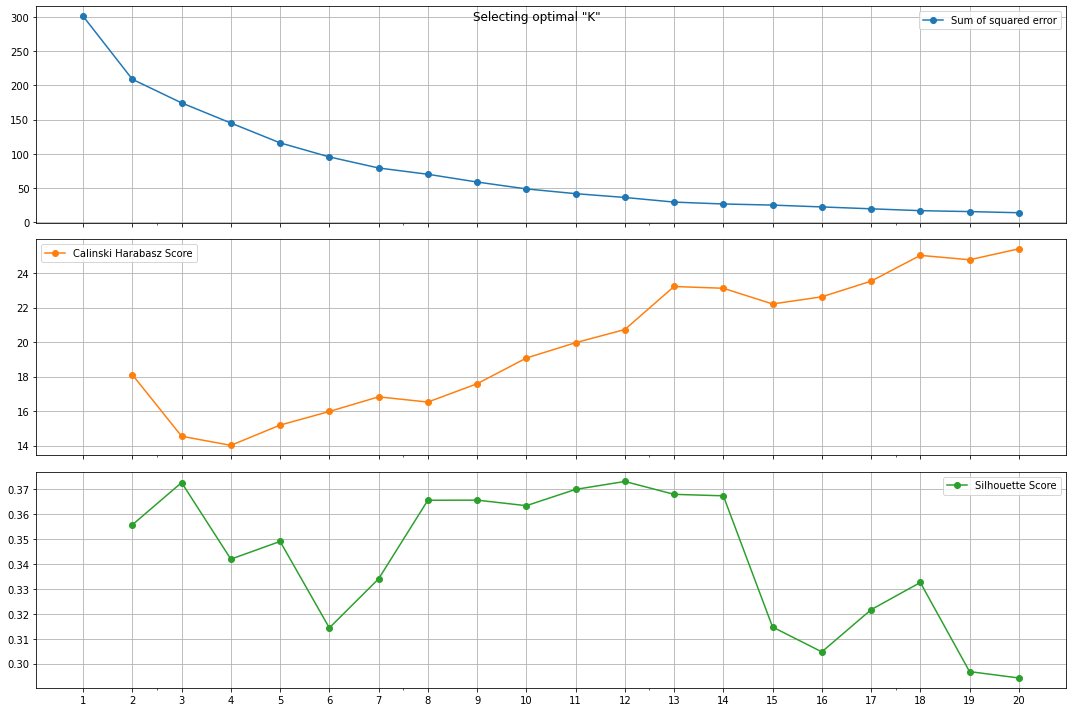

In [97]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(df)
        chs = calinski_harabasz_score(df, cluster)
        ss = silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

3개로 결정

In [80]:
df.rename(columns={'안내소까지의 최단거리':'minInformation'},inplace=True)
df.rename(columns={'관광명소까지의 최단거리':'minTouristSpot'},inplace=True)
df.rename(columns={'동별 음식점 수':'restaurant'},inplace=True)
df.rename(columns={'동별 공원 수':'park'},inplace=True)
df.rename(columns={'동별 쇼핑센터 수':'shop'},inplace=True)
df.rename(columns={'도보시간':'minWalkingTime'},inplace=True)
df.rename(columns={'동별 숙박업소 수':'accommodation'},inplace=True)

In [81]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=3, random_state=312)

In [82]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0],
      dtype=int32)

In [83]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [88]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.351


In [89]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.060767
1    0.438826
2    0.388880
Name: k_silhouette_coeff, dtype: float64

In [90]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## Step 4. EDA/Interpretation

In [91]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,k_silhouette_coeff
k_means_cluster,,,,,,,,
0,1.327086,0.930018,0.219589,0.117626,-0.535151,-0.155907,-0.733898,0.060767
1,-0.589280,-0.185741,-0.446378,-0.561582,-0.453167,-0.116388,-0.110029,0.438826
2,0.309803,-0.414069,1.020351,1.442322,1.793948,0.479208,1.039534,0.388880


In [92]:
df.groupby('k_means_cluster').std()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,k_silhouette_coeff
k_means_cluster,,,,,,,,
0,1.042155,1.723728,1.436186,0.766392,0.558984,1.107031,0.140997,0.112945
1,0.347915,0.541089,0.611752,0.216768,0.399194,0.942562,0.971629,0.075471
2,0.866799,0.501681,0.584362,1.142470,0.000000,1.075262,0.814530,0.065411


In [93]:
from pandas.plotting import parallel_coordinates

In [94]:
palette = sns.color_palette("bright", 10)

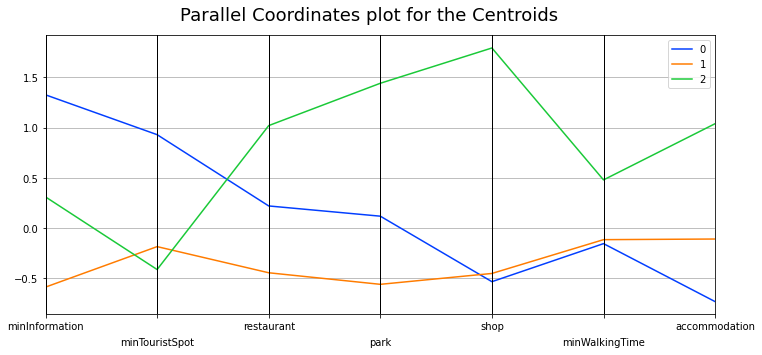

In [95]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [96]:
df['k_means_cluster'].unique()

array([1, 2, 0], dtype=int32)

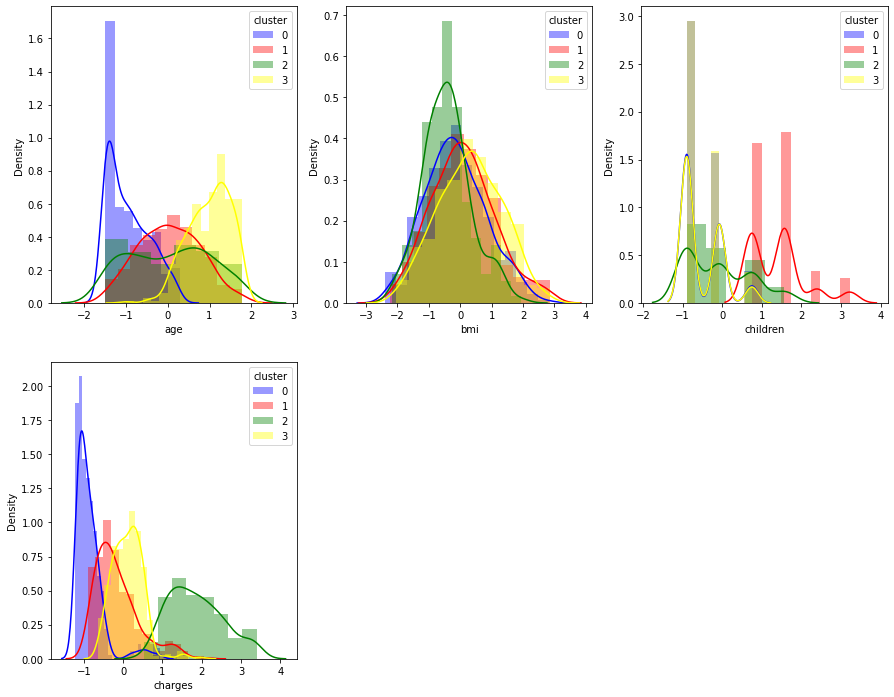

In [ ]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,12)) 
plt.subplot(2,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["age"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["age"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["age"], 
             color="green", label=2)
sns.distplot(df[df.k_means_cluster == 3]["age"], 
             color="yellow", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["bmi"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["bmi"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["bmi"], 
             color="green", label=2)
sns.distplot(df[df.k_means_cluster == 3]["bmi"], 
             color="yellow", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(df[df.k_means_cluster == 0]["children"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["children"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["children"], 
             color="green", label=2)
sns.distplot(df[df.k_means_cluster == 3]["children"], 
             color="yellow", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,4)
sns.distplot(df[df.k_means_cluster == 0]["charges"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["charges"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["charges"], 
             color="green", label=2)
sns.distplot(df[df.k_means_cluster == 3]["charges"], 
             color="yellow", label=3)
plt.legend(title="cluster")

plt.show()

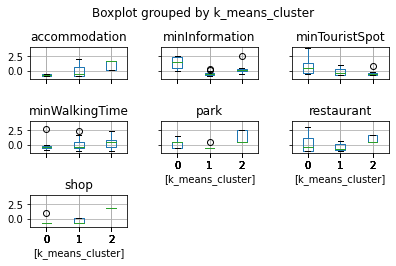

In [97]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

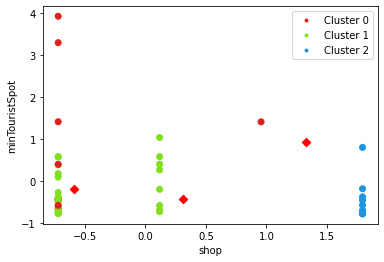

In [100]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
# 군집결과 시각화
plt.scatter(x=df['shop'], y=df['minTouristSpot'], c=df.c)
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') 
plt.xlabel('shop')
plt.ylabel('minTouristSpot')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

군집들이 잘 분리가 되었는지 확인하기 위해 scatter plot을 그렸보았다. bmi와 age를 변수로 출력해본 결과 군집0과 군집3은 잘 분리되었지만, 군집1와 군집2는 군집이 잘 분리되었다고 보기 어렵다. 

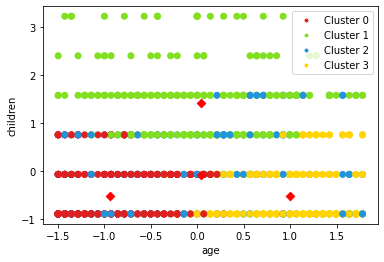

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#ffd400']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
# 군집결과 시각화
plt.scatter(x=df['age'], y=df['children'], c=df.c)
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,2], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('age')
plt.ylabel('children')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children과 age를 변수로 출력해본 결과 군집0과 군집1과 군집 3은은 잘 분리되었지만, 군집 4는 명확하게 분리되지 않은 모습이다.

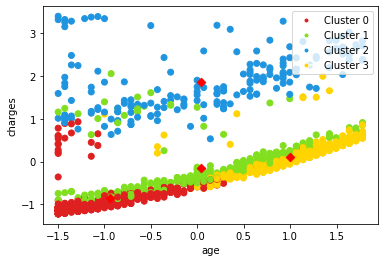

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#ffd400']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
# 군집결과 시각화
plt.scatter(x=df['age'], y=df['charges'], c=df.c)
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,3], marker='D', c='r') 
plt.xlabel('age')
plt.ylabel('charges')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

charges와 age를 변수로 출력해본 결과 군집0과 군집2와 군집3은 잘 분리되었지만, 군집1은 일부 데이터가 간격을 크게 두고 흩어져있어 잘 분리되었다고 보기 어렵다. 군집 0과 군집 3에서는 연령이 높아질수록 보험료가 높아지는 양적인 상관관계를 발견할 수 있었다.

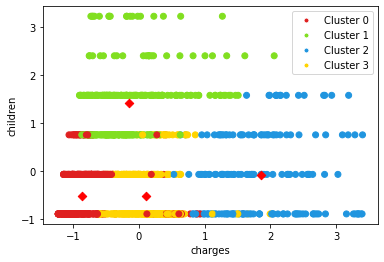

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#ffd400']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
# 군집결과 시각화
plt.scatter(x=df['charges'], y=df['children'], c=df.c)
plt.scatter(x=centroids.iloc[:,3], y=centroids.iloc[:,2], marker='D', c='r') 
plt.xlabel('charges')
plt.ylabel('children')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

charges와 children을 변수로 출력해본 결과 군집 4가지가 모두 명확히 분리돼있는 모습을 확인할 수 있다. 

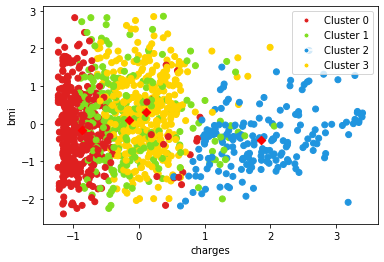

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#ffd400']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
# 군집결과 시각화
plt.scatter(x=df['charges'], y=df['bmi'], c=df.c)
plt.scatter(x=centroids.iloc[:,3], y=centroids.iloc[:,1], marker='D', c='r') 
plt.xlabel('charges')
plt.ylabel('bmi')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

charges와 bmi를 변수로 출력해본 결과 군집 4가지가 모두 명확히 분리된 모습을 확인할 수 있다. 

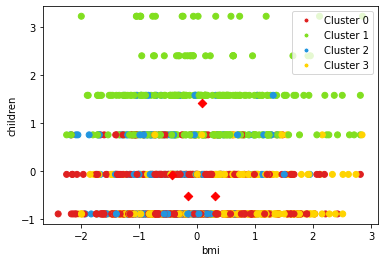

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#ffd400']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
# 군집결과 시각화
plt.scatter(x=df['bmi'], y=df['children'], c=df.c)
plt.scatter(x=centroids.iloc[:,1], y=centroids.iloc[:,2], marker='D', c='r') 
plt.xlabel('bmi')
plt.ylabel('children')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children과 bmi를 변수로 출력해본 결과 그나마 군집 0과 군집1이 분리돼있는 듯한 모습을 보인다. 그외 군집 2와 군집3은 흩어져있는 정도가 커 분리돼있다고 보기 어렵다.

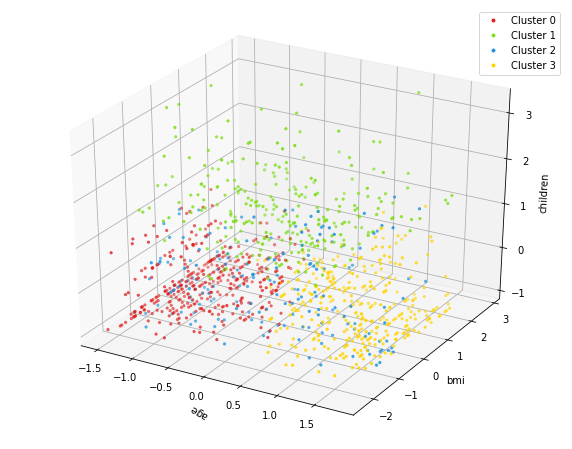

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['age'], df['bmi'], df['children'], s=5, c = df.c)
ax.set_xlabel('age', rotation=150)
ax.set_ylabel('bmi')
ax.set_zlabel(r'children', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, age, bmi를 변수로 3차원 scatter plot을 그려 보았을 때, 군집0, 군집1, 군집3 이 잘 분리된 것을 확인할 수 있다. 군집 2는 흩어진 정도가 커 명확하게 분리되지 않은 모습이다.

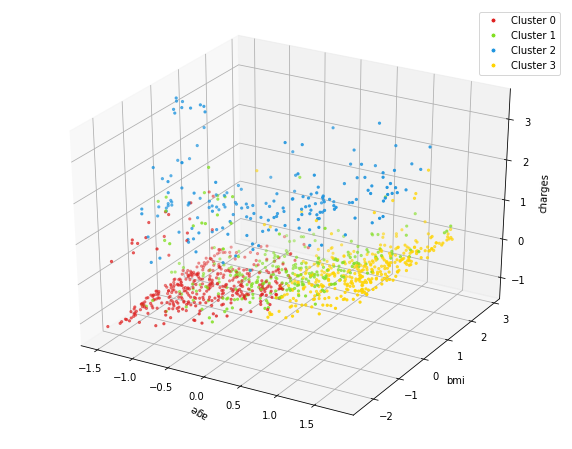

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['age'], df['bmi'], df['charges'], s=5, c = df.c)
ax.set_xlabel('age', rotation=150)
ax.set_ylabel('bmi')
ax.set_zlabel(r'charges', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, age, bmi로 3차원 scatter plot을 그려 보았을 때, 군집0, 군집2, 군집3 이 잘 분리된 것을 확인할 수 있다. 군집1은 흩어진 정도가 커 명확하게 분리되지 않은 모습이다.

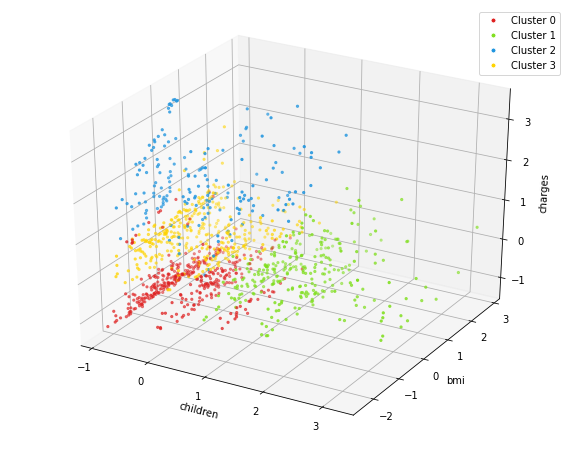

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['children'], df['bmi'], df['charges'], s=5, c = df.c)
ax.set_xlabel('children', rotation=150)
ax.set_ylabel('bmi')
ax.set_zlabel(r'charges', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, bmi, charges로 3차원 scatter plot을 그려 보았을 때, 군집 4가지가 모두 명확히 분리된 모습을 확인할 수 있다.

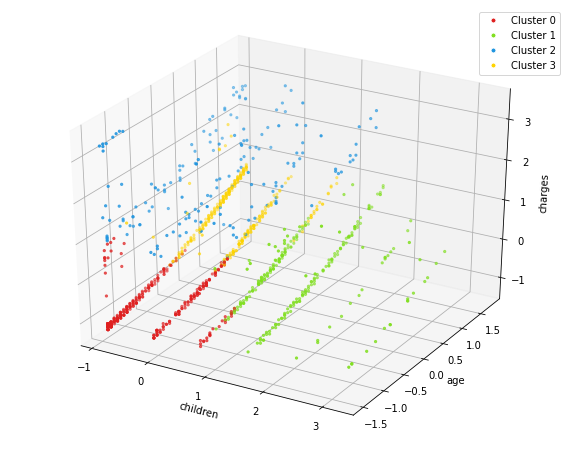

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['children'], df['age'], df['charges'], s=5, c = df.c)
ax.set_xlabel('children', rotation=150)
ax.set_ylabel('age')
ax.set_zlabel(r'charges', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, age, charges를 변수로 3차원 scatter plot을 그려 보았을 때, 군집 4가지가 모두 명확히 분리된 것을 확인할 수 있다. 특히 군집0, 군집1, 군집3에 대해서는 각 변수들이 양의 상관관계가 있음을 확인할 수 있었다.

In [ ]:
df_w_cat = df.copy()
df_w_cat['sex'] = data['sex']
df_w_cat['smoker'] = data['smoker']
df_w_cat['region'] = data['region']
df_w_cat.drop('c',axis=1)

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
df_w_cat.drop('c',axis=1,inplace=True)

In [ ]:
df_w_cat

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
cluster0 = df_w_cat[df_w_cat["k_means_cluster"]==0]
cluster1 = df_w_cat[df_w_cat["k_means_cluster"]==1]
cluster2 = df_w_cat[df_w_cat["k_means_cluster"]==2]
cluster3 = df_w_cat[df_w_cat["k_means_cluster"]==3]

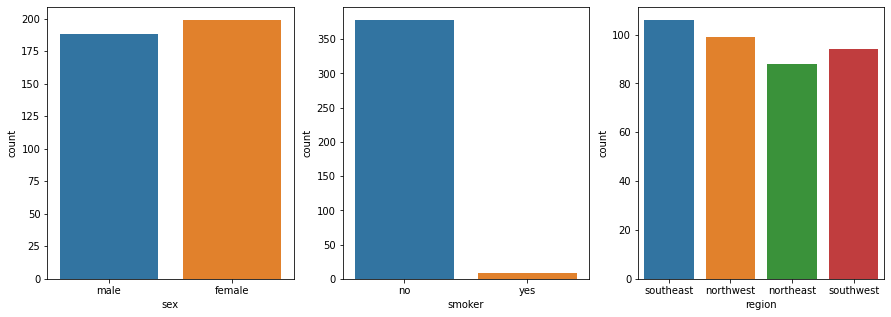

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster0, ax = ax[0])
sns.countplot(x = "smoker",data = cluster0, ax = ax[1])
sns.countplot(x = "region",data = cluster0, ax = ax[2])
pass

각 변수별로 군집의 특성을 파악하기 위해 subplots를 그려 확인하였다. 위 그래프는 sex, smoker, region에 따른 데이터 분류이고, 각각 (female, male), (smoker, no smoker), (southeast, northeast, northwest, southwest) 로 분류되었다. 군집0은 남성보다 여성이 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southeast, northwest, southwest, northeast 순으로 빈도수가 높았다.

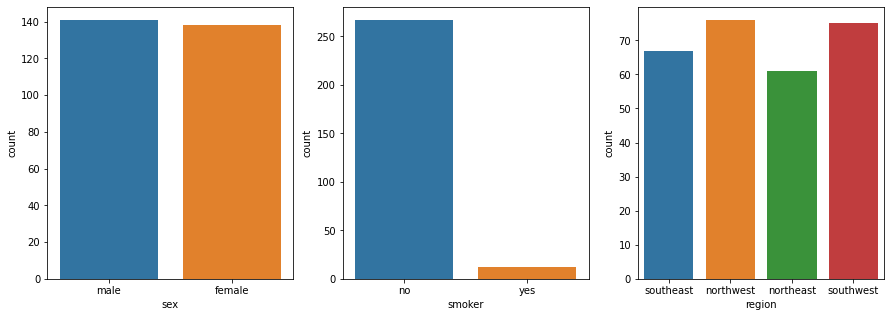

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster1, ax = ax[0])
sns.countplot(x = "smoker",data = cluster1, ax = ax[1])
sns.countplot(x = "region",data = cluster1, ax = ax[2])
pass

군집1은 남성이 여성보다 약간 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southwest, northwest, southeast, northeast 순으로 빈도수가 높았다.

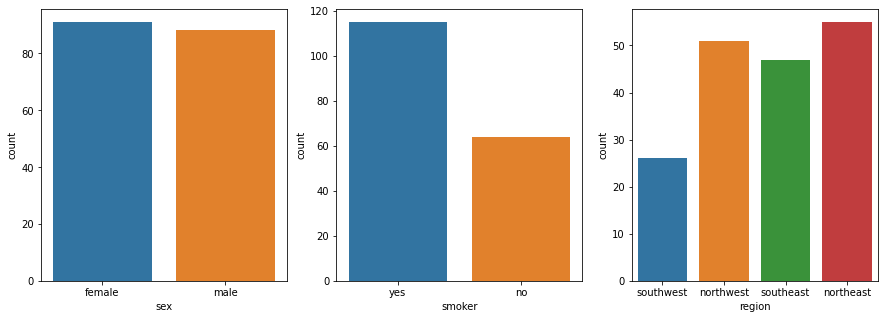

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster2, ax = ax[0])
sns.countplot(x = "smoker",data = cluster2, ax = ax[1])
sns.countplot(x = "region",data = cluster2, ax = ax[2])
pass


군집2는 여성이 남성보다 약간 많고, 흡연자가 비흡연자보다 많았으며, 거주지는 northeast, northwest, southeast, southwest 순으로 빈도수가 높았다.



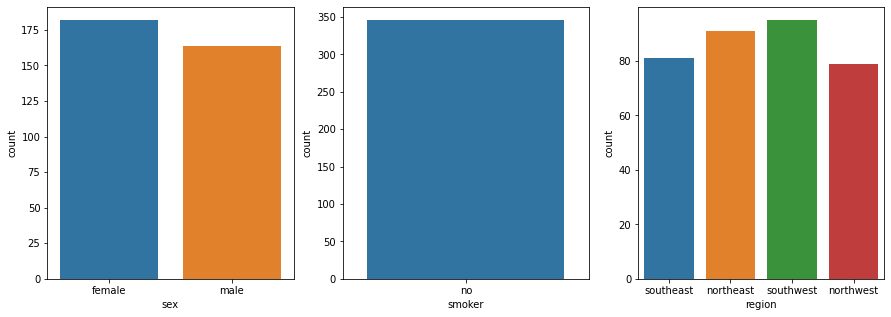

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster3, ax = ax[0])
sns.countplot(x = "smoker",data = cluster3, ax = ax[1])
sns.countplot(x = "region",data = cluster3, ax = ax[2])
pass

군집3은 여성이 남성보다 약간 많고, 흡연자가 아예 없었으며, 거주지는 southwest, northeast,southeast,northwest 순으로 빈도수가 높았다.

# K-means 클러스터링

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## K 결정

In [101]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples

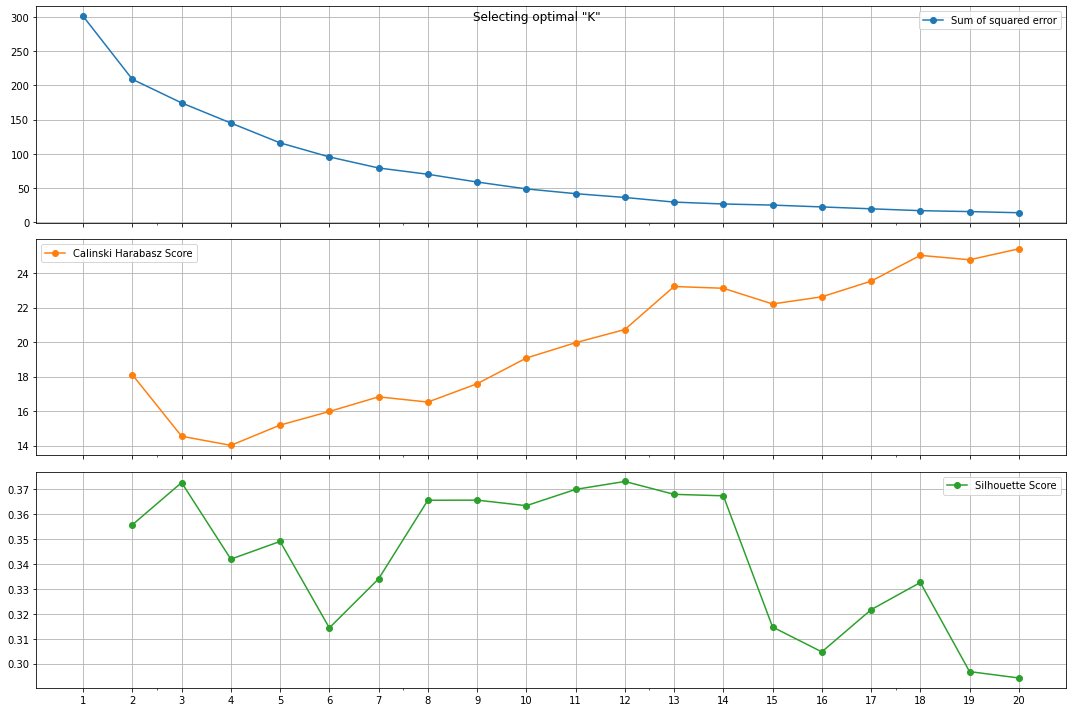

In [ ]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(df)
        chs = calinski_harabasz_score(df, cluster)
        ss = silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

2개로 결정

In [95]:
df = scaled.copy()

In [96]:
df.rename(columns={'안내소까지의 최단거리':'minInformation'},inplace=True)
df.rename(columns={'관광명소까지의 최단거리':'minTouristSpot'},inplace=True)
df.rename(columns={'동별 음식점 수':'restaurant'},inplace=True)
df.rename(columns={'동별 공원 수':'park'},inplace=True)
df.rename(columns={'동별 쇼핑센터 수':'shop'},inplace=True)
df.rename(columns={'도보시간':'minWalkingTime'},inplace=True)
df.rename(columns={'동별 숙박업소 수':'accommodation'},inplace=True)

## 클러스터링 하기

In [97]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=2, random_state=312)

In [98]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int32)

In [99]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [102]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.371


In [103]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.379869
1    0.344737
Name: k_silhouette_coeff, dtype: float64

In [104]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## EDA/Interpretation

In [122]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,k_silhouette_coeff
k_means_cluster,,,,,,,,
0,-0.083017,0.100689,-0.369993,-0.440717,-0.467396,-0.111000,-0.266384,0.379869
1,0.273956,-0.332272,1.220979,1.454365,1.542406,0.366299,0.879066,0.344737


In [123]:
df.groupby('k_means_cluster').std()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,k_silhouette_coeff
k_means_cluster,,,,,,,,
0,1.059122,1.103202,0.733573,0.394637,0.443920,0.981943,0.889269,0.116571
1,0.825050,0.539098,0.840267,1.077804,0.795448,1.074806,0.920456,0.111346


In [124]:
from pandas.plotting import parallel_coordinates

In [125]:
palette = sns.color_palette("bright", 10)

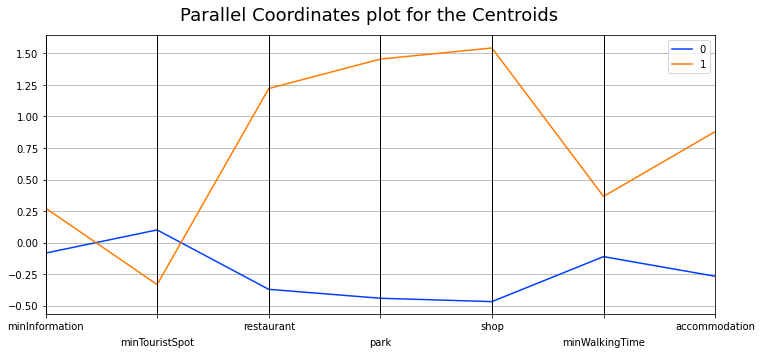

In [126]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [135]:
df

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,k_means_cluster,k_silhouette_coeff,c
0,-0.455769,1.042207,-0.727407,-0.604935,0.116997,0.620344,0.633924,0,0.349501,#DF2020
1,0.164962,-0.774432,1.636323,2.646592,1.793948,2.366910,0.180944,1,0.387184,#81DF20
2,-0.673627,-0.374068,-1.118088,-0.604935,-0.721479,1.731795,-0.884891,0,0.413465,#DF2020
3,-0.616724,-0.674082,-1.118088,-0.604935,-0.721479,2.366910,-0.884891,0,0.344246,#DF2020
4,-0.641436,0.587013,0.152171,-0.604935,0.116997,0.461566,-0.618432,0,0.405026,#DF2020
5,-0.988382,0.100783,0.564678,-0.604935,-0.721479,-0.967442,1.966218,0,0.234100,#DF2020
6,-0.986431,-0.721670,-0.727407,-0.604935,0.116997,0.461566,0.633924,0,0.350116,#DF2020
7,-0.988382,-0.438209,-0.572444,-0.604935,-0.721479,1.414238,-0.884891,0,0.424029,#DF2020
8,-0.109148,0.272515,0.088877,-0.604935,0.116997,0.302787,-0.192098,0,0.406695,#DF2020
9,-0.041840,-0.176472,0.527574,0.478907,1.793948,-0.332327,1.726405,1,0.343938,#81DF20


In [127]:
df['k_means_cluster'].unique()

array([0, 1], dtype=int32)

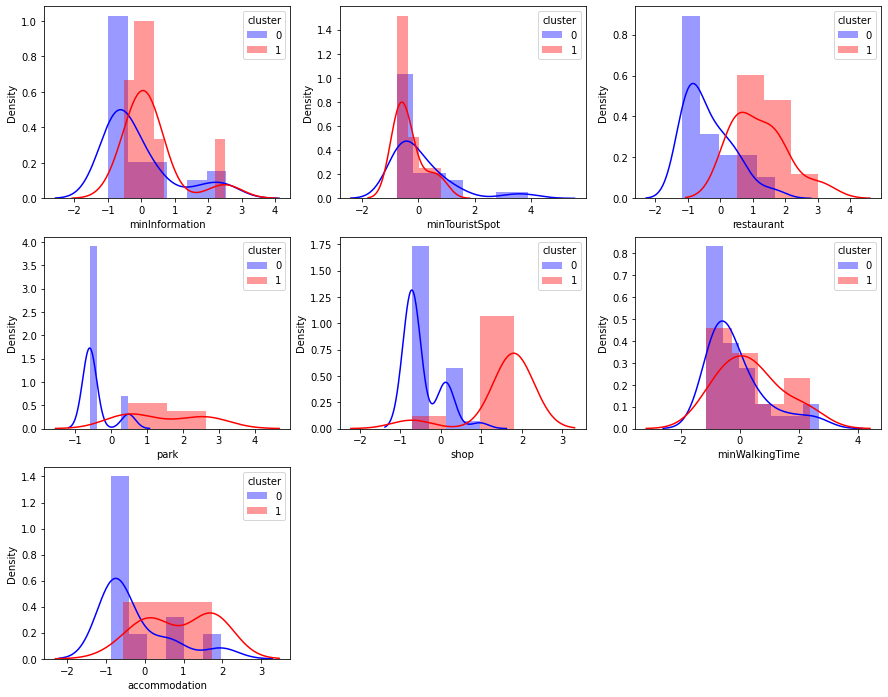

In [133]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,12)) 
plt.subplot(3,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["minInformation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minInformation"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["minTouristSpot"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minTouristSpot"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,3)
sns.distplot(df[df.k_means_cluster == 0]["restaurant"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["restaurant"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,4)
sns.distplot(df[df.k_means_cluster == 0]["park"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["park"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,5)
sns.distplot(df[df.k_means_cluster == 0]["shop"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["shop"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,6)
sns.distplot(df[df.k_means_cluster == 0]["minWalkingTime"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minWalkingTime"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,7)
sns.distplot(df[df.k_means_cluster == 0]["accommodation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["accommodation"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.show()

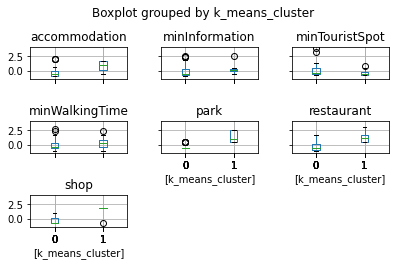

In [128]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

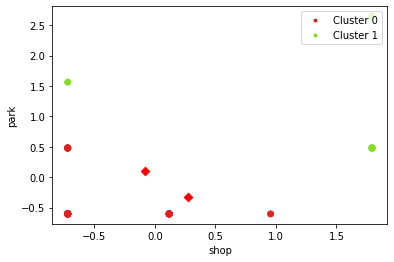

In [134]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1]})
# 군집결과 시각화
plt.scatter(x=df['shop'], y=df['park'], c=df.c)
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') 
plt.xlabel('shop')
plt.ylabel('park')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

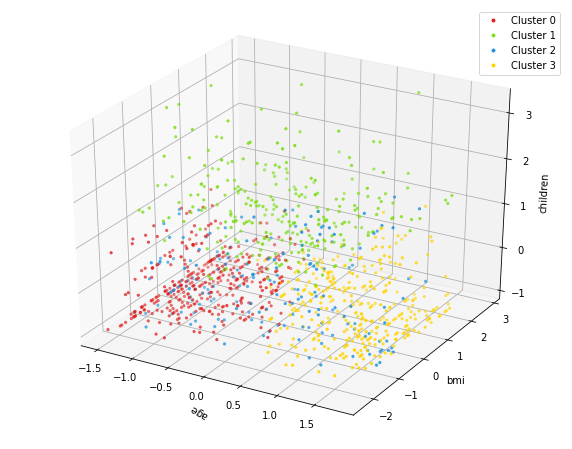

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['age'], df['bmi'], df['children'], s=5, c = df.c)
ax.set_xlabel('age', rotation=150)
ax.set_ylabel('bmi')
ax.set_zlabel(r'children', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, age, bmi를 변수로 3차원 scatter plot을 그려 보았을 때, 군집0, 군집1, 군집3 이 잘 분리된 것을 확인할 수 있다. 군집 2는 흩어진 정도가 커 명확하게 분리되지 않은 모습이다.

In [ ]:
df_w_cat = df.copy()
df_w_cat['sex'] = data['sex']
df_w_cat['smoker'] = data['smoker']
df_w_cat['region'] = data['region']
df_w_cat.drop('c',axis=1)

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
df_w_cat.drop('c',axis=1,inplace=True)

In [ ]:
df_w_cat

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
cluster0 = df_w_cat[df_w_cat["k_means_cluster"]==0]
cluster1 = df_w_cat[df_w_cat["k_means_cluster"]==1]
cluster2 = df_w_cat[df_w_cat["k_means_cluster"]==2]
cluster3 = df_w_cat[df_w_cat["k_means_cluster"]==3]

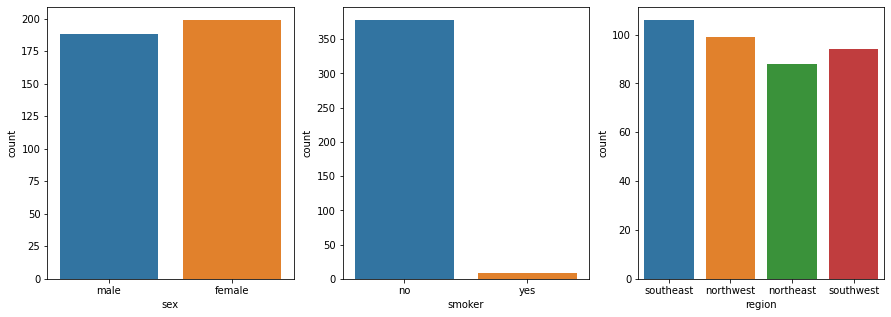

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster0, ax = ax[0])
sns.countplot(x = "smoker",data = cluster0, ax = ax[1])
sns.countplot(x = "region",data = cluster0, ax = ax[2])
pass

각 변수별로 군집의 특성을 파악하기 위해 subplots를 그려 확인하였다. 위 그래프는 sex, smoker, region에 따른 데이터 분류이고, 각각 (female, male), (smoker, no smoker), (southeast, northeast, northwest, southwest) 로 분류되었다. 군집0은 남성보다 여성이 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southeast, northwest, southwest, northeast 순으로 빈도수가 높았다.

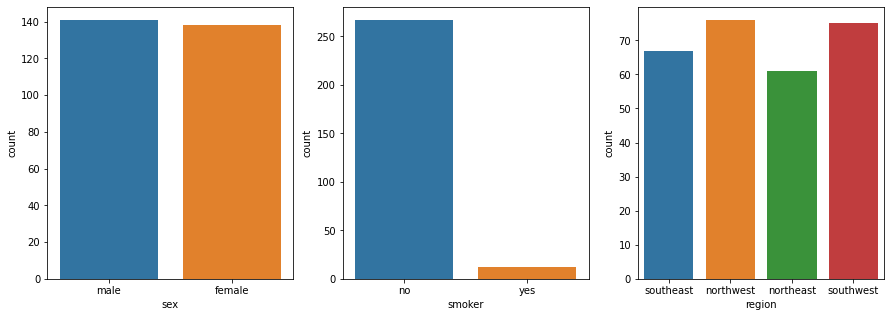

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster1, ax = ax[0])
sns.countplot(x = "smoker",data = cluster1, ax = ax[1])
sns.countplot(x = "region",data = cluster1, ax = ax[2])
pass

군집1은 남성이 여성보다 약간 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southwest, northwest, southeast, northeast 순으로 빈도수가 높았다.

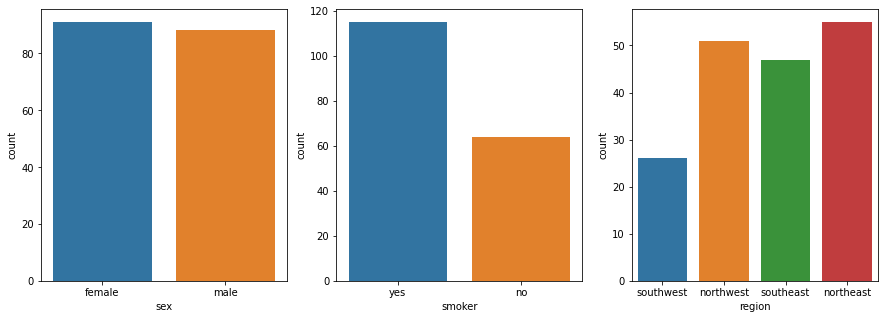

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster2, ax = ax[0])
sns.countplot(x = "smoker",data = cluster2, ax = ax[1])
sns.countplot(x = "region",data = cluster2, ax = ax[2])
pass


군집2는 여성이 남성보다 약간 많고, 흡연자가 비흡연자보다 많았으며, 거주지는 northeast, northwest, southeast, southwest 순으로 빈도수가 높았다.



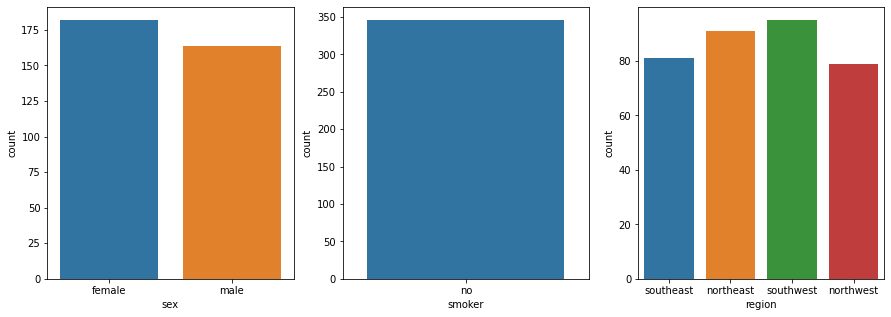

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster3, ax = ax[0])
sns.countplot(x = "smoker",data = cluster3, ax = ax[1])
sns.countplot(x = "region",data = cluster3, ax = ax[2])
pass

군집3은 여성이 남성보다 약간 많고, 흡연자가 아예 없었으며, 거주지는 southwest, northeast,southeast,northwest 순으로 빈도수가 높았다.

# 친화도를 나타내는 데이터셋

In [79]:
final.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,최단거리안내소,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",NaN,NaN,NaN,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,NaN,1.0,12,57.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),NaN,NaN,NaN,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),NaN,NaN,NaN,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,NaN,NaN,19,NaN
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),NaN,NaN,NaN,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,NaN,NaN,23,NaN
4,Busan Bridge [부산대교],My Name [마이네임] (2021),NaN,NaN,NaN,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,NaN,1.0,11,10.0


In [80]:
num.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,1638,1756,222,0.0,1.0,12,57.0
1,3547,0,1305,3.0,3.0,23,40.0
2,968,387,43,0.0,0.0,19,0.0
3,1143,97,43,0.0,0.0,23,0.0
4,1067,1316,625,0.0,1.0,11,10.0


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler_ = MinMaxScaler()
scaler_.fit(num)
scaled2 = scaler_.transform(num)

df2= pd.DataFrame(scaled2, columns=num.columns)

print(f"최소\n{df2.min()}")
print(f"최대\n{df2.max()}")

최소
안내소까지의 최단거리     0.0
관광명소까지의 최단거리    0.0
동별 음식점 수        0.0
동별 공원 수         0.0
동별 쇼핑센터 수       0.0
도보시간            0.0
동별 숙박업소 수       0.0
dtype: float64
최대
안내소까지의 최단거리     1.0
관광명소까지의 최단거리    1.0
동별 음식점 수        1.0
동별 공원 수         1.0
동별 쇼핑센터 수       1.0
도보시간            1.0
동별 숙박업소 수       1.0
dtype: float64


In [84]:
df2.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,0.150898,0.386614,0.109270,0.0,0.333333,0.458333,0.532710
1,0.326762,0.000000,0.670119,1.0,1.000000,0.916667,0.373832
2,0.089175,0.085205,0.016572,0.0,0.000000,0.750000,0.000000
3,0.105297,0.021356,0.016572,0.0,0.000000,0.916667,0.000000
4,0.098296,0.289740,0.317970,0.0,0.333333,0.416667,0.093458


In [85]:
# 최단거리는 작을수록 좋으므로 바꾸어준다.
df2['안내소까지의 최단거리'] = 1 - df2['안내소까지의 최단거리']
df2['관광명소까지의 최단거리'] = 1 - df2['관광명소까지의 최단거리']
df2['도보시간'] = 1- df2['도보시간']

In [86]:
df2.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,0.849102,0.613386,0.109270,0.0,0.333333,0.541667,0.532710
1,0.673238,1.000000,0.670119,1.0,1.000000,0.083333,0.373832
2,0.910825,0.914795,0.016572,0.0,0.000000,0.250000,0.000000
3,0.894703,0.978644,0.016572,0.0,0.000000,0.083333,0.000000
4,0.901704,0.710260,0.317970,0.0,0.333333,0.583333,0.093458


In [87]:
df2['외국인친화도']=df2['안내소까지의 최단거리']*7 + df2['관광명소까지의 최단거리']*6 + df2['동별 음식점 수']*5 + df2['동별 공원 수']*4 + df2['동별 쇼핑센터 수']*3 + df2['도보시간']*2 + df2['동별 숙박업소 수']

In [88]:
df2.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도
0,0.849102,0.613386,0.109270,0.0,0.333333,0.541667,0.532710,12.786422
1,0.673238,1.000000,0.670119,1.0,1.000000,0.083333,0.373832,21.603761
2,0.910825,0.914795,0.016572,0.0,0.000000,0.250000,0.000000,12.447402
3,0.894703,0.978644,0.016572,0.0,0.000000,0.083333,0.000000,12.384308
4,0.901704,0.710260,0.317970,0.0,0.333333,0.583333,0.093458,14.423463


In [89]:
# 0~10까지의 범위로 나타내주기
df2['외국인친화도'] = (df2['외국인친화도'] / 28)*100

In [90]:
#정수화한 버전도 추가
df2['외국인친화도(정수)']=df2['외국인친화도'].round(0).astype(int)

In [91]:
df2.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수)
0,0.849102,0.613386,0.109270,0.0,0.333333,0.541667,0.532710,45.665794,46
1,0.673238,1.000000,0.670119,1.0,1.000000,0.083333,0.373832,77.156289,77
2,0.910825,0.914795,0.016572,0.0,0.000000,0.250000,0.000000,44.455006,44
3,0.894703,0.978644,0.016572,0.0,0.000000,0.083333,0.000000,44.229672,44
4,0.901704,0.710260,0.317970,0.0,0.333333,0.583333,0.093458,51.512369,52


In [110]:
df4 = df2[['외국인친화도','외국인친화도(정수)']]

In [111]:
final2 = pd.concat([final, df4], axis=1)

In [112]:
final2.fillna(0,inplace=True)

In [113]:
final2.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,최단거리안내소,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수)
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,0.0,1.0,12,57.0,45.665794,46
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0,77.156289,77
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,44.455006,44
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,44.229672,44
4,Busan Bridge [부산대교],My Name [마이네임] (2021),0,0,0,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,51.512369,52


In [114]:
df3 = df['k_means_cluster']

In [115]:
final3 = pd.concat([final2, df3], axis=1)

In [116]:
final3.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,최단거리안내소,...,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수),k_means_cluster
0,Busan X The Sky [부산엑스더스카이],"Now, We Are Breaking Up [지금, 헤어지는 중입니다] (2021-22)",0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,...,해운대,1756,222,0.0,1.0,12,57.0,45.665794,46,0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],My Name [마이네임] (2021),0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,...,해동용궁사,0,1305,3.0,3.0,23,40.0,77.156289,77,1
2,Baetmeori Sikdang [뱃머리식당],My Name [마이네임] (2021),0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,...,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,44.455006,44,0
3,Hyein Shipbuilding [혜인선박],My Name [마이네임] (2021),0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,...,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,44.229672,44,0
4,Busan Bridge [부산대교],My Name [마이네임] (2021),0,0,0,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,...,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,51.512369,52,0


In [117]:
final3.to_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/최종외국인친화도데이터셋.csv')